In [45]:
import sys
import os


sys.path.append(os.path.abspath("../..")) #make the folder "automl" part of this

RESULTS_PATH = 'results.csv'
OPTUNA_DATABASE = 'study_results.db'
BASE_CONFIGURATION_NAME = 'configuration'


In [46]:
from automl.loggers.result_logger import ResultLogger
import optuna
import optuna.visualization as vis
from automl.utils.optuna_utils import load_study_from_database
import matplotlib.pyplot as plt


In [47]:
AGGREGATE_NUMBER = 20 #the number of neighbor points to sum to plot the needed graphs

# Load the experiment

In [48]:
if False:

    experiments_base_path = "C:\\Users\\rgoncalo\\Universidade\\ricardo-goncalo-thesis-project\\project\\examples\\simple_metarl\\archived_data\\sb3_montaincar_semi_trained_reduced_or_not"
    experiment_specific_path = "sb3_montaincar_semi_trained_200"
    
    experiment_path = f"{experiments_base_path}\\{experiment_specific_path}\\Experiment"
    #experiment_path = 'data\\experiments\\HyperparameterOptimizationPipeline_0'
    #experiment_path = 'archived_data\\first'

In [49]:
if False:

    #hp_model_name = 'sb3_CartPole_dqn_gaussian_0_0.05_0.3'
    #hp_model_name = 'sb3_CartPole_dqn_gaussian_0_0.2_0.8'
    #hp_model_name = 'sb3_CartPole_dqn'
    #hp_model_name = 'sb3_CartPole_dqn_perturbed_0_10'
    hp_model_name = 'sb3_CartPole_dqn_forgotten_100_1e-17'
    
    
    hp_experiment_name=f'sb3_zoo_dqn_cartpole_hp_opt'
    
    
    experiment_path = f'C:\\rgoncalo\\experiments\\{hp_experiment_name}\\experiments\\{hp_model_name}'

In [50]:
if True:

    base_experiment_path = "C:\\Experiments\\rl-zoo-CartPole-dqn\\HPOpt\\first\\experiments"

    hp_model_name = 'sb3_CartPole_dqn_gaussian_0_0.05_0.3'
    #hp_model_name = 'sb3_CartPole_dqn_gaussian_0_0.2_0.8'
    #hp_model_name = 'sb3_CartPole_dqn'
    #hp_model_name = 'sb3_CartPole_dqn_perturbed_0_10'
    #hp_model_name = 'sb3_CartPole_dqn_forgotten_100_1e-17'
    
    experiment_path = f'{base_experiment_path}\\{hp_model_name}'

In [51]:
if not os.path.exists(experiment_path):
    raise Exception("DOES NOT EXIST")

# Evaluation of HyperparameterOptimizationPipeline

In [52]:
from automl.meta_rl.hp_optimization_pipeline import HyperparameterOptimizationPipeline

hp_results_columns = HyperparameterOptimizationPipeline.results_columns

In [53]:
hyperparameter_optimization_results : ResultLogger = ResultLogger(input={
                                        "base_directory" : experiment_path,
                                        "artifact_relative_directory" : '',
                                        "results_filename" : RESULTS_PATH,
                                        "results_columns" : hp_results_columns,
                                        "create_new_directory" : False
                                      })

hyperparameter_optimization_results.proccess_input_if_not_proccesd()

print(f"Hyperparameter_optimization_results in path: {hyperparameter_optimization_results.get_artifact_directory()}")

Hyperparameter_optimization_results in path: C:\Experiments\rl-zoo-CartPole-dqn\HPOpt\first\experiments\sb3_CartPole_dqn_gaussian_0_0.05_0.3\


In [54]:
optuna_study = load_study_from_database(database_path=hyperparameter_optimization_results.get_artifact_directory() + '\\' + OPTUNA_DATABASE)


## Hyperparameter Study

In [55]:
try:
    print(f"optuna_study done with with best value {optuna_study.best_value} in trial {optuna_study.best_trial.number} with best parameters:\n{optuna_study.best_params}")

except:
    print("No best trial yet")

optuna_study done with with best value 14.474039879739868 in trial 60 with best parameters:
{'discount_factor': 0.9843762123979333, 'learning_rate': 0.05152701712505045, 'target_update_rate': 0.9831824310558055, 'epsilon_end': 0.012910823367887396, 'optimization_interval': 2462, 'learning_start_ep_delay': 5919}


In [56]:
print("\n===== Trials Info =====")
for t in optuna_study.trials:
    print(f"Trial {t.number}:")
    print(f"  State: {t.state}")
    print(f"  Value: {t.value}")
    print(f"  Params: {t.params}")
    print(f"  User attrs: {t.user_attrs}")
    print(f"  System attrs: {t.system_attrs}")
    print("-" * 40)


===== Trials Info =====
Trial 0:
  State: 1
  Value: 14.181669986732961
  Params: {'discount_factor': 0.99, 'learning_rate': 0.0023, 'target_update_rate': 1.0, 'epsilon_end': 0.04, 'optimization_interval': 2048, 'learning_start_ep_delay': 5000}
  User attrs: {}
  System attrs: {'fixed_params': {'discount_factor': 0.99, 'learning_rate': 0.0023, 'target_update_rate': 1.0, 'epsilon_end': 0.04, 'optimization_interval': 2048, 'learning_start_ep_delay': 5000}}
----------------------------------------
Trial 1:
  State: 1
  Value: 13.352786404500042
  Params: {'discount_factor': 0.8332197938408349, 'learning_rate': 0.017368460919435943, 'target_update_rate': 0.9073504568695795, 'epsilon_end': 0.00808307880116418, 'optimization_interval': 1564, 'learning_start_ep_delay': 5980}
  User attrs: {}
  System attrs: {}
----------------------------------------
Trial 2:
  State: 1
  Value: 12.981669986732962
  Params: {'discount_factor': 0.7428608797096811, 'learning_rate': 0.03383677374119255, 'target

In [57]:
from optuna.importance import get_param_importances

importances = get_param_importances(optuna_study)

# Print nicely
for param, importance in importances.items():
    print(f"{param}: {importance:.4f}")

learning_start_ep_delay: 0.8247
optimization_interval: 0.0716
epsilon_end: 0.0450
learning_rate: 0.0254
target_update_rate: 0.0197
discount_factor: 0.0135


In [58]:
fig = vis.plot_param_importances(optuna_study)
fig.show()

In [59]:


fig = vis.plot_parallel_coordinate(optuna_study)
fig.show()

In [60]:
fig = vis.plot_intermediate_values(optuna_study)
fig.show()

In [61]:
fig = vis.plot_optimization_history(optuna_study)
fig.show()

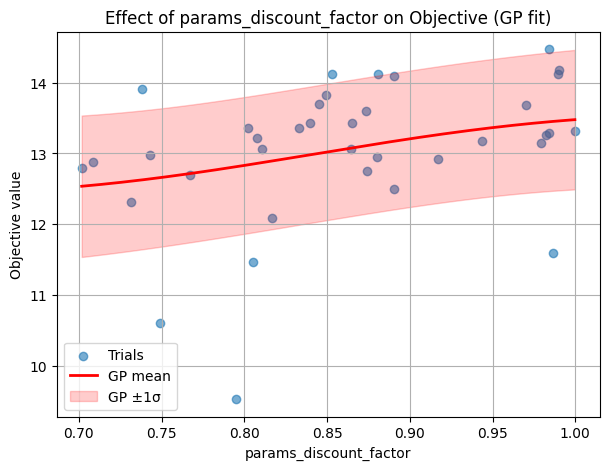

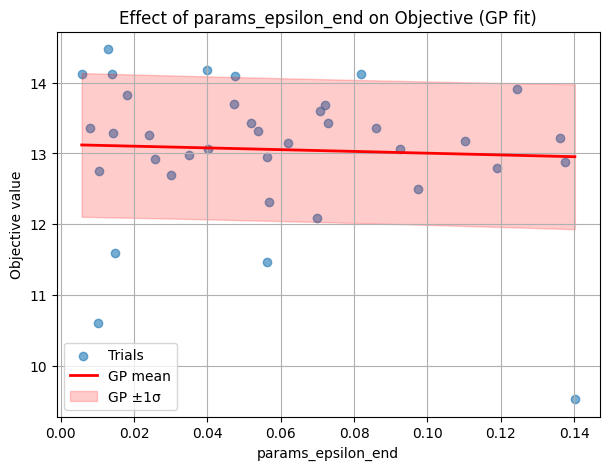

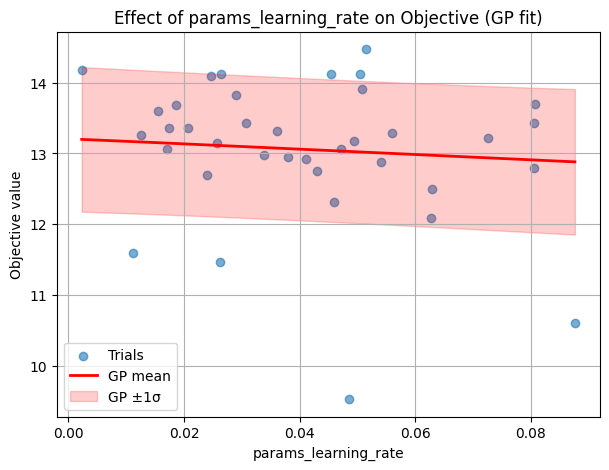

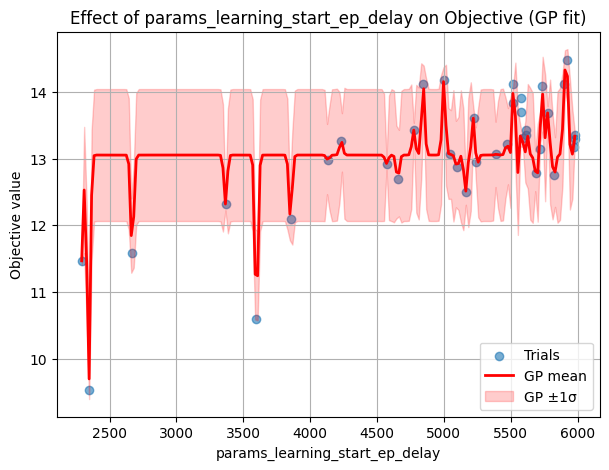

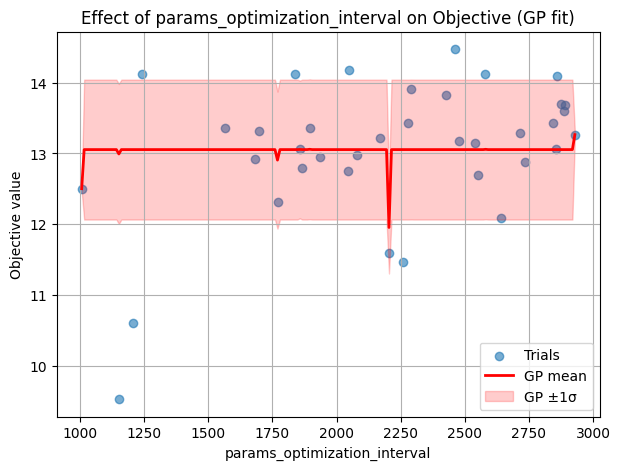

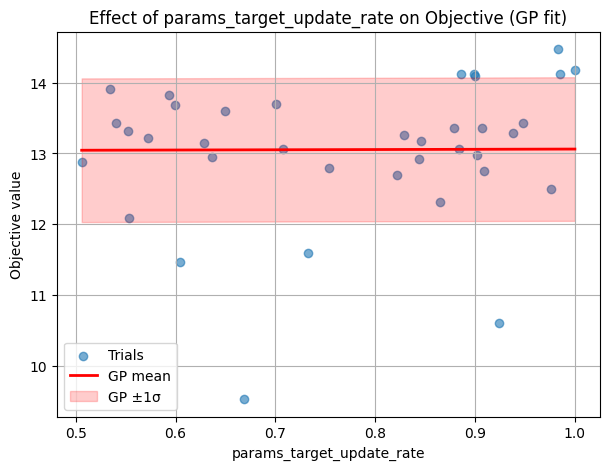

In [62]:
import optuna
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Assume `optuna_study` is already loaded
df = optuna_study.trials_dataframe()  # columns: value, params_*, state, etc.

# Only consider completed trials
df = df[df['state'] == 'COMPLETE']

# Get all hyperparameter columns
param_cols = [c for c in df.columns if c.startswith("params_")]

# Plot each hyperparameter vs objective with Gaussian Process regression
for param in param_cols:
    plt.figure(figsize=(7, 5))

    # Extract values and objective
    x = df[param].values
    y = df['value'].values

    # Scatter plot: parameter vs objective
    plt.scatter(x, y, alpha=0.6, label="Trials")

    # Only fit GP if the param is numeric
    if np.issubdtype(x.dtype, np.number):
        # Reshape for sklearn (expects 2D arrays)
        X = x.reshape(-1, 1)
        Y = y.reshape(-1, 1)

        # Kernel: RBF (smooth function) + WhiteKernel (noise)
        kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

        gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, random_state=0)
        gp.fit(X, Y)

        # Predict on smooth range
        x_range = np.linspace(min(x), max(x), 200).reshape(-1, 1)
        y_mean, y_std = gp.predict(x_range, return_std=True)

        # Plot GP mean
        plt.plot(x_range, y_mean, "r-", lw=2, label="GP mean")

        # Plot uncertainty band (±1 std)
        plt.fill_between(
            x_range.ravel(),
            (y_mean - y_std).ravel(),
            (y_mean + y_std).ravel(),
            color="r",
            alpha=0.2,
            label="GP ±1σ"
        )

    plt.xlabel(param)
    plt.ylabel("Objective value")
    plt.title(f"Effect of {param} on Objective (GP fit)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [63]:
#parameters_to_plot = ["hidden_size", "hidden_layers"]

#fig = vis.plot_contour(optuna_study, params=parameters_to_plot)
#fig.show()

In [64]:
#parameters_to_plot = ["epsilon_start", "epsilon_decay", "epsilon_end"]

#fig = vis.plot_contour(optuna_study, params=parameters_to_plot)
#fig.show()

# Global evaluation of configurations

In [65]:
def study_of_configuration(configuration_name : str, results_logger : ResultLogger):

    #results_logger.plot_graph(x_axis='episode', y_axis=[('total_reward', name)], to_show=False)

    results_logger.plot_confidence_interval(x_axis='episode', y_column='episode_reward',show_std=True, to_show=False, y_values_label="mov_avg_std", aggregate_number=AGGREGATE_NUMBER)

    #results_logger.plot_linear_regression(x_axis='episode', y_axis='episode_reward', to_show=False)

    #results_logger.plot_piecewise_linear_regression(x_axis='episode', y_axis='episode_reward', to_show=False, n_segments=10)

    results_logger.plot_polynomial_regression(x_axis='episode', y_axis='episode_reward', to_show=False, degrees=4)


    results_logger.plot_current_graph(title=configuration_name, y_label="episode_reward")

In [66]:

results_of_configurations : dict[str, ResultLogger] = {}

configurations_results_relative_path = "RLTrainerComponent"

for configuration_name in os.listdir(experiment_path):
    
    if configuration_name.startswith(BASE_CONFIGURATION_NAME):

        configuration_path = os.path.join(experiment_path, configuration_name)

        if os.path.isdir(configuration_path):  # Ensure it's a file, not a subdirectory

            try:
                results_logger_of_config = ResultLogger(input={
                                            "results_filename" : RESULTS_PATH,
                                            "base_directory" : f"{configuration_path}\\{configurations_results_relative_path}",
                                            "artifact_relative_directory" : '',
                                            "create_new_directory" : False

                                          })
            
                results_logger_of_config.proccess_input()

                results_of_configurations[configuration_name] = results_logger_of_config

            except Exception as e:
                print(f"Did not manage to store configuration {configuration_name} due to error {e}")

        else:
            print(f"WARNING: Configuration path with name {configuration_name} is not a directory")


In [67]:
print(f"Configurations:  {results_of_configurations.keys()}")

Configurations:  dict_keys(['configuration_0', 'configuration_1', 'configuration_10', 'configuration_11', 'configuration_12', 'configuration_13', 'configuration_14', 'configuration_15', 'configuration_16', 'configuration_17', 'configuration_18', 'configuration_19', 'configuration_2', 'configuration_20', 'configuration_21', 'configuration_22', 'configuration_23', 'configuration_24', 'configuration_25', 'configuration_26', 'configuration_27', 'configuration_28', 'configuration_29', 'configuration_3', 'configuration_30', 'configuration_31', 'configuration_32', 'configuration_33', 'configuration_34', 'configuration_35', 'configuration_36', 'configuration_37', 'configuration_38', 'configuration_39', 'configuration_4', 'configuration_40', 'configuration_41', 'configuration_42', 'configuration_43', 'configuration_44', 'configuration_45', 'configuration_46', 'configuration_47', 'configuration_48', 'configuration_49', 'configuration_5', 'configuration_50', 'configuration_51', 'configuration_52'

# Global view of performance

c:\Users\rgoncalo\Universidade\ricardo-goncalo-thesis-project\project\automl\loggers\result_logger.py:201: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



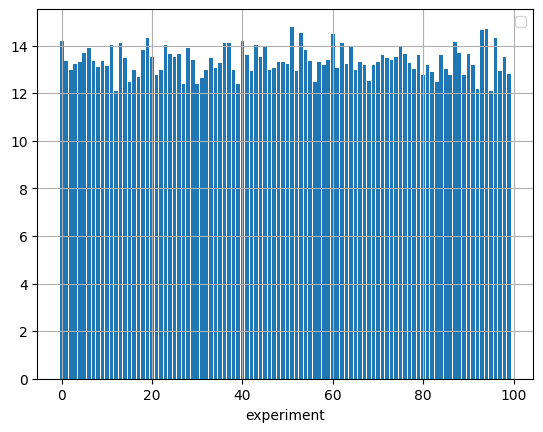

In [68]:
hyperparameter_optimization_results.plot_bar_graph(x_axis='experiment', y_axis='result')

## Pruned Performances

In [69]:
pruned_optuna_trials = [trial for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.PRUNED]

pruned_optuna_trials_per_steps : dict[int, list[optuna.trial.FrozenTrial]] = {} #the pruned trials by the number of completed steps

for pruned_optuna_trial in pruned_optuna_trials:
    
    n_completed_steps = len(pruned_optuna_trial.intermediate_values)
    
    try:
        list_of_pruned = pruned_optuna_trials_per_steps[n_completed_steps]
    
    except:
        list_of_pruned = []
        pruned_optuna_trials_per_steps[n_completed_steps] = list_of_pruned    
        
    list_of_pruned.append(pruned_optuna_trial)


for list_of_pruned in pruned_optuna_trials_per_steps.values():
    list_of_pruned.sort(key=lambda trial: trial.value) 
    
    

pruned_trials = [f'configuration_{trial.number + 1}' for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.PRUNED]

print(f"Pruned trials: {pruned_trials}")


Pruned trials: ['configuration_11', 'configuration_13', 'configuration_16', 'configuration_17', 'configuration_18', 'configuration_22', 'configuration_23', 'configuration_28', 'configuration_30', 'configuration_31', 'configuration_32', 'configuration_33', 'configuration_34', 'configuration_35', 'configuration_36', 'configuration_39', 'configuration_40', 'configuration_42', 'configuration_43', 'configuration_45', 'configuration_47', 'configuration_48', 'configuration_49', 'configuration_50', 'configuration_51', 'configuration_53', 'configuration_56', 'configuration_57', 'configuration_58', 'configuration_59', 'configuration_60', 'configuration_62', 'configuration_64', 'configuration_66', 'configuration_67', 'configuration_68', 'configuration_69', 'configuration_70', 'configuration_71', 'configuration_72', 'configuration_73', 'configuration_74', 'configuration_75', 'configuration_77', 'configuration_78', 'configuration_79', 'configuration_80', 'configuration_81', 'configuration_82', 'con

### Worst Pruned Trials

In [70]:
WORST_PRUNED = 3

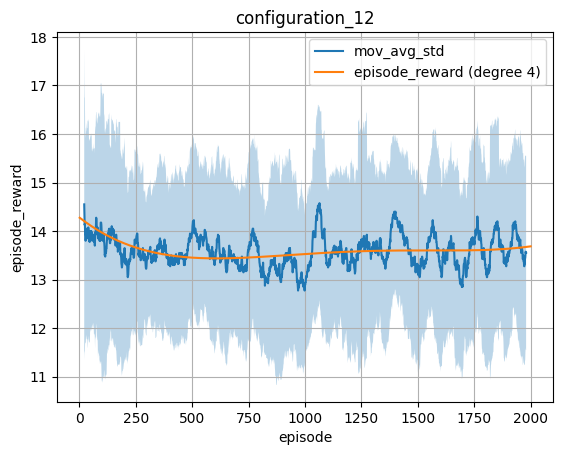

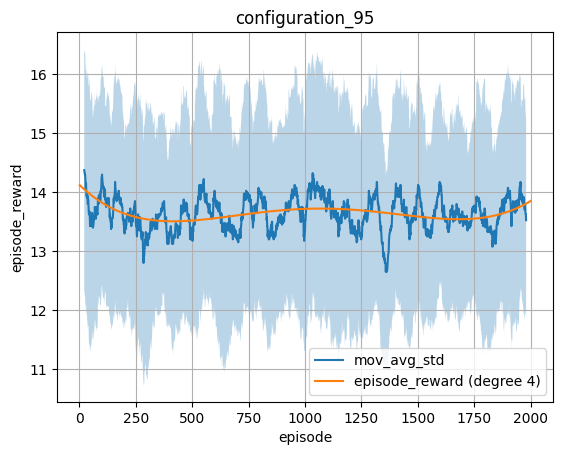

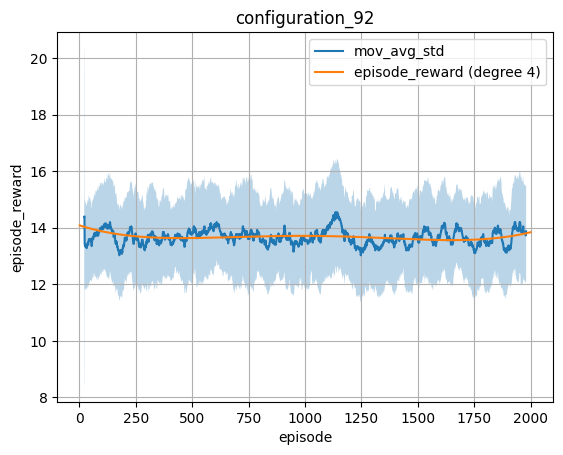

In [71]:
for n_completed_steps in pruned_optuna_trials_per_steps.keys():
    
    pruned_optuna_trials : list[optuna.Trial] = pruned_optuna_trials_per_steps[n_completed_steps][0:WORST_PRUNED] 
    
    pruned_trials = [f'configuration_{trial.number}' for trial in pruned_optuna_trials ]

    for configuration_name in pruned_trials:
        
        results_logger = results_of_configurations[configuration_name]
    
        study_of_configuration(configuration_name, results_logger)

### Best Pruned Trials

In [72]:
BEST_PRUNED = 3

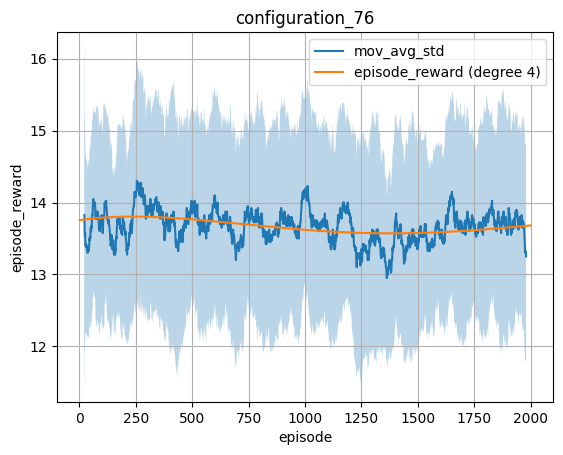

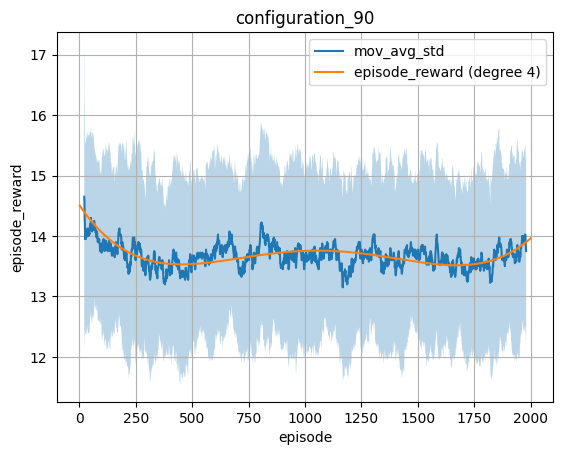

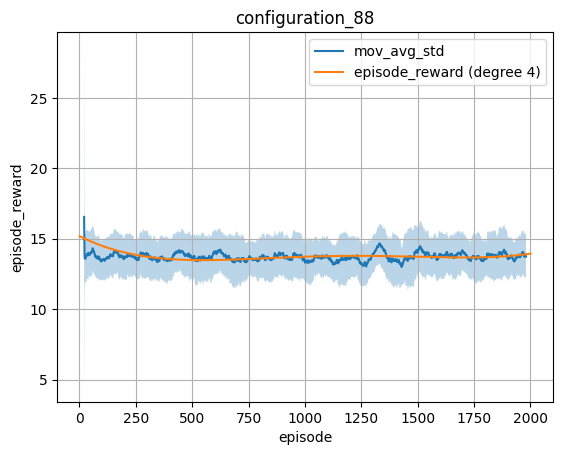

In [73]:
for n_completed_steps in pruned_optuna_trials_per_steps.keys():
    
    #correct this
    pruned_optuna_trials : list[optuna.Trial] = pruned_optuna_trials_per_steps[n_completed_steps][-BEST_PRUNED:] 
    
    pruned_trials = [f'configuration_{trial.number}' for trial in pruned_optuna_trials ]

    for configuration_name in pruned_trials:
        
        results_logger = results_of_configurations[configuration_name]
    
        study_of_configuration(configuration_name, results_logger)

## Completed Trials Evaluation

In [74]:
completed_optuna_trials = [trial for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.COMPLETE]

completed_optuna_trials.sort(key=lambda trial: trial.value) # sort given the trial value


### Worst Completed Performances

In [75]:
N_WORST = 3

In [76]:

worst_optuna_trials = completed_optuna_trials[0:N_WORST]

worst_configurations_to_study = [f"configuration_{trial.number}" for trial in worst_optuna_trials]

print(f"Worst configurations to study: {worst_configurations_to_study}")

Worst configurations to study: ['configuration_14', 'configuration_8', 'configuration_4']


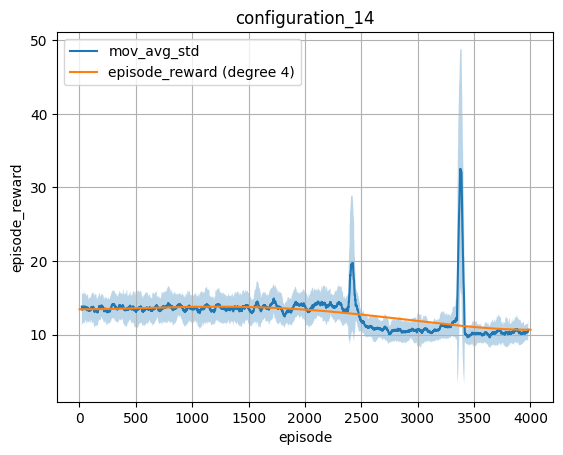

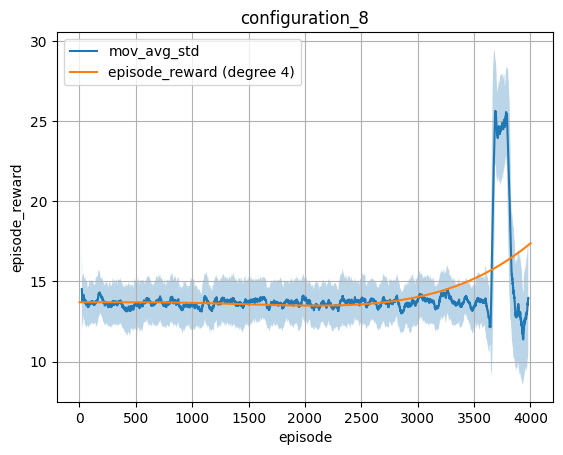

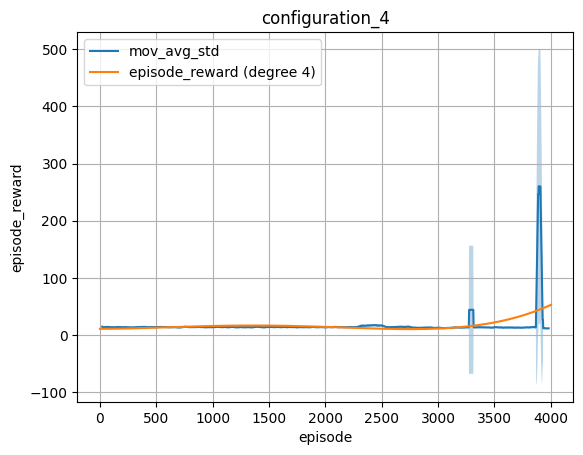

In [77]:
for configuration_name in worst_configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]

    study_of_configuration(configuration_name, results_logger)



## Non Completed Performances

In [78]:
non_completed_optuna_trials = [trial for trial in optuna_study.trials if trial.state == optuna.trial.TrialState.RUNNING or trial.state == optuna.trial.TrialState.WAITING]

non_completed_optuna_trials.sort(key=lambda trial: trial.value) # sort given the trial value

### All non completed trials

In [79]:
non_completed_trials = [f"configuration_{trial.number}" for trial in non_completed_optuna_trials]


In [80]:
for configuration_name in non_completed_trials:
    
    results_logger = results_of_configurations[configuration_name]

    study_of_configuration(configuration_name, results_logger)

## Best Performances

In [81]:
N_BEST = 3

In [82]:
best_optuna_trials = completed_optuna_trials[(len(completed_optuna_trials) - N_BEST):]

best_configurations_to_study = [f"configuration_{trial.number}" for trial in best_optuna_trials]

print(f"Best configurations to study: {best_configurations_to_study}")

Best configurations to study: ['configuration_62', 'configuration_0', 'configuration_60']


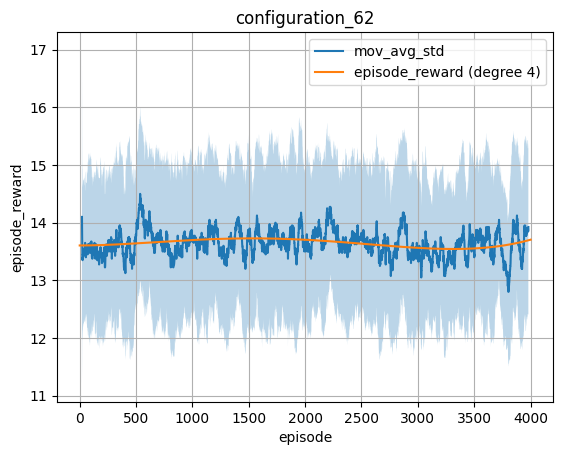

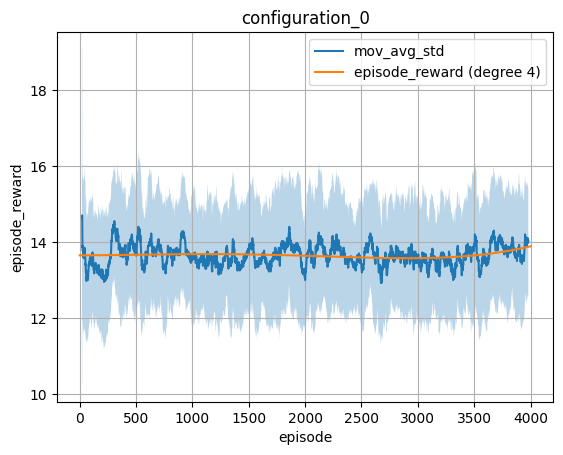

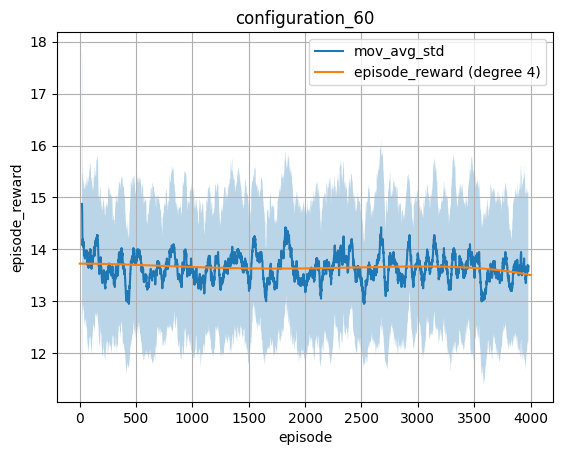

In [83]:
for configuration_name in best_configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]

    study_of_configuration(configuration_name, results_logger)

# Smaller study

In [84]:
configurations_to_study = ['configuration_0']

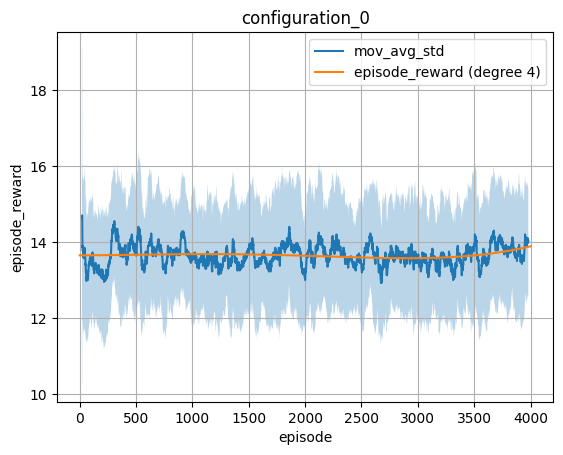

In [85]:

try:

    for configuration_name in configurations_to_study:
    
        results_logger = results_of_configurations[configuration_name]

        study_of_configuration(configuration_name, results_logger)

except KeyError as e:
    print(f"KeyError: {e}\nAvailable keys are {results_of_configurations.keys()}")
    raise e

In [86]:
agents_in_study = []
# agents_in_study = ["agent_1", "agent_2"]

In [87]:
agents_to_study : dict[str, ResultLogger]= {}

for configuration_name in configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]
    
    for agent_name in agents_in_study:
      
        agent_results_logger = ResultLogger(input={
                                            "logger_directory" : f"{results_logger.lg.logDir}\\{agent_name}",
                                            "filename" : RESULTS_PATH,
                                            "create_new_directory" : False
                                          })

        agents_to_study[f"{configuration_name}_{agent_name}"] = agent_results_logger
        
        agent_results_logger.proccess_input()


In [88]:
for agent_name, agent_results_logger in agents_to_study.items():
    
    study_of_configuration(agent_name, agent_results_logger)